In [66]:
import skimage
import os
import utils
import processing
import time

from skimage import io

import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure
from skimage.feature import canny

from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import ndimage as ndi
from skimage.morphology import remove_small_objects
from skimage.filters import sobel
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)
from skimage.segmentation import chan_vese

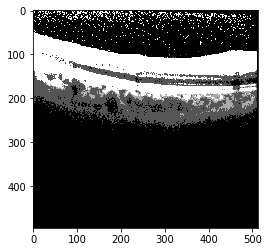

In [128]:
def produceContrast4Tone(grayImage):
	gray_r = grayImage.reshape(grayImage.shape[0]*grayImage.shape[1])
	for i in range(gray_r.shape[0]):
		if gray_r[i] > gray_r.mean():
			gray_r[i] = 3
		elif gray_r[i] > 0.5:
			gray_r[i] = 2
		elif gray_r[i] > 0.25:
			gray_r[i] = 1
		else:
			gray_r[i] = 0
	grayImage = gray_r.reshape(grayImage.shape[0],grayImage.shape[1])
	plt.imshow(grayImage, cmap='gray')

	return grayImage

image = utils.readImageGrayscaled('sample2')
processed_test = produceContrast4Tone(image)

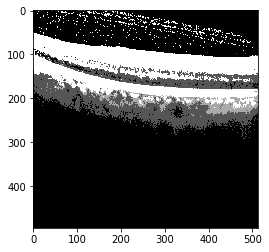

In [138]:
image = utils.readImageGrayscaled('sample')
processed = processing.produceContrast3Tone(image)

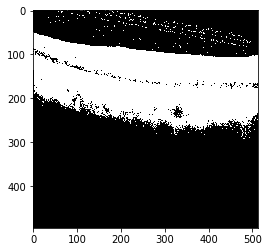

In [122]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

import skimage.filters as filters

image = utils.readImageGrayscaled('sample')
img_fl = filters.threshold_yen(image, nbins=2)

# image_show(image > img_fl);

filtered = image > img_fl;

plt.imshow(filtered, cmap='gray')


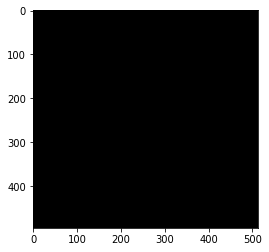

In [123]:
import skimage.filters as filters

image = utils.readImageGrayscaled('sample')
block_size = 35
local_thresh = filters.threshold_local(image, block_size, offset=10)

filtered_local = image > local_thresh;

plt.imshow(filtered_local, cmap='gray')

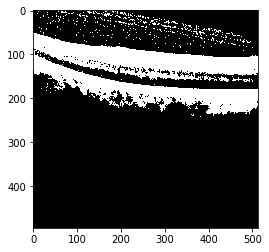

In [96]:
img_fl = filters.threshold_isodata(processed)

# image_show(image > img_fl);

filtered = image > img_fl;

plt.imshow(filtered, cmap='gray')

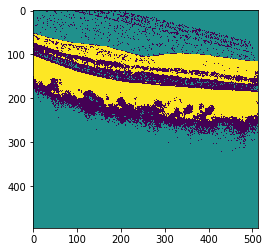

In [153]:
image = utils.readImageGrayscaled('sample4')

markers = np.zeros(image.shape, dtype=np.uint8)
markers[image < 0.25] = 1
markers[image > 0.5] = 2

plt.imshow(markers)

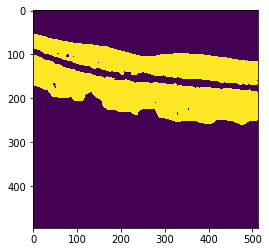

In [154]:
labels = seg.random_walker(image, markers, beta=10, mode='bf')
plt.imshow(labels)

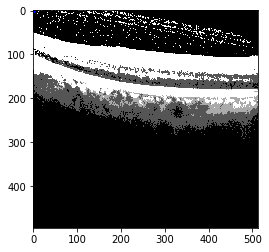

In [137]:
y = 200
x = 250
points = utils.circle_points(200, [y, x], r)[:-1]

gray = processed

image_labels = np.zeros(gray.shape, dtype=np.uint8)
indices_mid = draw.circle_perimeter(y, x, 20) # from here
indices_right = draw.circle_perimeter(y + 20, gray.shape[1] - 40, 20)
indices_left = draw.circle_perimeter(y - 40, (2 * 20), 20)#from here
image_labels[indices_mid] = 1
image_labels[indices_right] = 1
image_labels[indices_left] = 1
image_labels[90,:] = 2
image_labels[300,:] = 2
# image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2

# plt.imshow(image_labels)
fig, ax = plt.subplots()
ax.imshow(gray, cmap=plt.cm.gray)
ax.plot(image_labels[:, 1], image_labels[:, 0], '-b', lw=3)



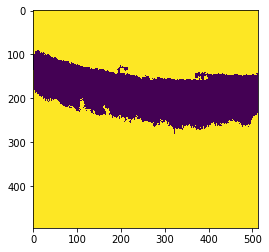

In [133]:
image_segmented = seg.random_walker(processed, image_labels)
plt.imshow(image_segmented)

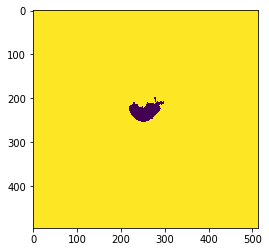

In [108]:
image_segmented = seg.random_walker(filtered, image_labels, beta=300)
plt.imshow(image_segmented)